In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

# config inline backend: this ensure the plot is on the same page
%matplotlib inline 

In [2]:
# set print/display options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
sns.set_context('notebook')
sns.set_style('white')

practice

In [3]:
def practice():
    return np.identity(5)

In [4]:
practice()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Linear Regression in One Variable

In [5]:
# load data from file
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

# load values in X and y
X =  np.c_[np.ones(data.shape[0]), data[:,0]]
y = np.c_[data[:,1]]

Text(0, 0.5, 'Profit in $10,000s')

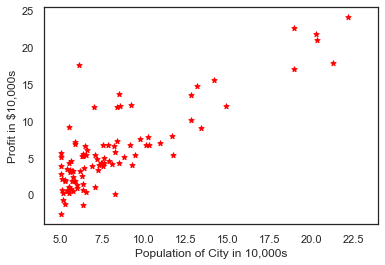

In [6]:
# Plot data
plt.scatter(X[:,1], y, s=30, c='r', marker='*', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# Gradient Decent

In [7]:
# defiine function to compute cost
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    j = 0
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    return J

In [8]:
computeCost(X, y)

32.072733877455676

In [9]:
# define gradient descent optimizer
def gradientDescent(X, y, theta=[[0],[0]], alpha = 0.01, num_iters=2000):
    m = y.size
    J_his = np.zeros(num_iters)
    
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_his[i] = computeCost(X, y, theta)
    return theta, J_his

theta: [-3.78806857  1.18221277]


Text(0.5, 0, 'Number of Iterations')

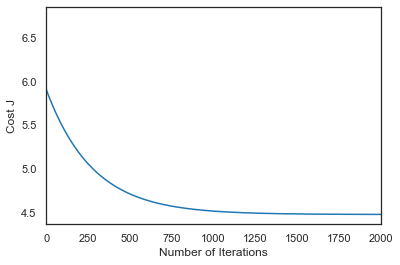

In [10]:
# VRun gradient deacent for 2000 iterations
theta, cost_J = gradientDescent(X, y)
# print optimized value of theta
print("theta:", theta.ravel())
# plot loss function
plt.xlim((0, 2000))
plt.plot(cost_J)
plt.ylabel("Cost J")
plt.xlabel("Number of Iterations")

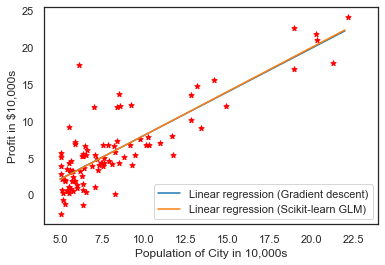

In [11]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='*', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [12]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[3496.76138928]
[44874.20850579]


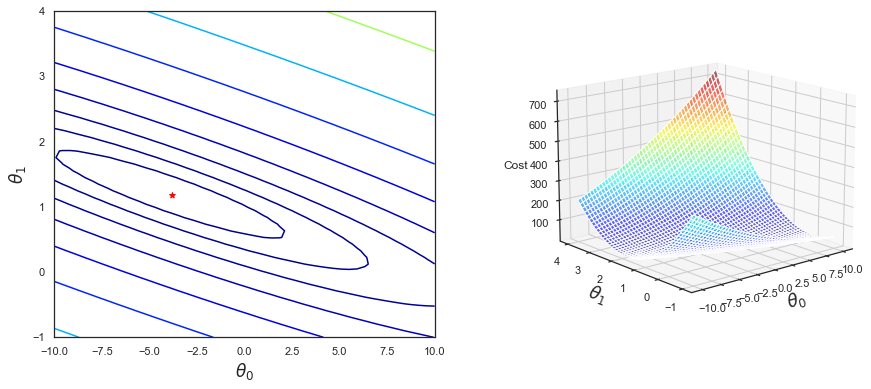

In [13]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

# Plot figure
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r', marker='*')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)